# 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).


## 1. Make classification data ready

we're going to use `sklearn.datasets`, `make_circles`


In [1]:
import sklearn

from sklearn.datasets import make_circles

# Make 1000 samples
num_samples = 1000

# Create circles
X, y = make_circles(n_samples=num_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [4]:
# Make a pd dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


#### Visualize, visualize, visualize
A blog post explaining matplotlib `colormaps`: https://www.deeplearningnerds.com/matplotlib-color-maps/#:~:text=Use%20Colormap%20in%20Scatter%20Plot&text=The%20color%20range%20must%20be,we%20can%20use%20different%20Colormaps.

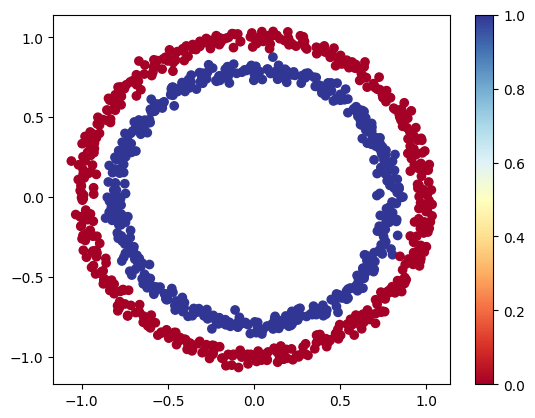

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.show()

#### Note: The data we're working with is often referred to as a **Toy Dataset**, a dataset that is small enough to experiment on but still sizeable enough to practice the fundamentals.

More about scikit-learn generated toy datasets - https://scikit-learn.org/stable/datasets/sample_generators.html

More about the `make_circles` generator we've used - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

A blog post about different datasets on sk-learn datasets - https://hackernoon.com/16-best-sklearn-datasets-for-building-machine-learning-models

### 1.1 Check input and output shapes

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [18]:
# Check types and data types
type(X),type(y), X.dtype, y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

Data is in numpy array but we should convert it to PyTorch's tensors, `torch.tensor`

In [19]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape of one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [20]:
import torch
torch.__version__

'2.2.1+cpu'

In [21]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [22]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))